In [1]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [50]:
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('owid-covid-data.csv')
df = pd.DataFrame(data)

In [3]:
df.describe(include='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,176915,166543,176915,176915,1.705890e+05,1.704180e+05,1.684200e+05,1.524910e+05,152509.000000,150338.000000,...,110779.000000,109260.000000,71785.000000,129342.000000,165390.000000,142477.000000,6.078000e+03,6078.000000,6078.000000,6078.000000
unique,242,6,242,827,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MEX,Africa,Mexico,27/08/2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,827,41177,827,242,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.804276e+06,1.235623e+04,1.238798e+04,6.032844e+04,167.759772,169.480505,...,10.643343,32.784399,50.849561,3.027518,73.671122,0.725434,3.899161e+04,9.582009,15.804225,1035.395150
std,NaN,NaN,NaN,NaN,1.736063e+07,8.863358e+04,8.707537e+04,3.156062e+05,819.876991,804.983832,...,10.579863,13.524269,31.810835,2.447291,7.463881,0.149850,1.088362e+05,16.258235,29.521194,1482.622037
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,NaN,NaN,NaN,NaN,2.251000e+03,1.000000e+00,7.000000e+00,8.500000e+01,0.000000,0.143000,...,1.900000,21.600000,20.859000,1.300000,69.590000,0.602000,-4.415000e+01,-0.450000,-0.560000,-18.981390
50%,NaN,NaN,NaN,NaN,2.980500e+04,7.900000e+01,1.080000e+02,8.280000e+02,2.000000,2.429000,...,6.300000,31.400000,49.839000,2.400000,75.090000,0.743000,3.585550e+03,6.300000,7.380000,512.797169
75%,NaN,NaN,NaN,NaN,3.271110e+05,1.076000e+03,1.177571e+03,7.746500e+03,19.000000,21.143000,...,19.300000,41.300000,82.502000,4.000000,79.190000,0.845000,2.639225e+04,14.640000,22.465000,1699.146465


* There are 242 unique countries and regions
* but... there are only 195 countries in the world
* Recorded for 827 days

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
# Change to date format
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

## Let's get rid of the columns that I think I won't use

In [6]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]

In [7]:
col_mapping

['0:iso_code',
 '1:continent',
 '2:location',
 '3:date',
 '4:total_cases',
 '5:new_cases',
 '6:new_cases_smoothed',
 '7:total_deaths',
 '8:new_deaths',
 '9:new_deaths_smoothed',
 '10:total_cases_per_million',
 '11:new_cases_per_million',
 '12:new_cases_smoothed_per_million',
 '13:total_deaths_per_million',
 '14:new_deaths_per_million',
 '15:new_deaths_smoothed_per_million',
 '16:reproduction_rate',
 '17:icu_patients',
 '18:icu_patients_per_million',
 '19:hosp_patients',
 '20:hosp_patients_per_million',
 '21:weekly_icu_admissions',
 '22:weekly_icu_admissions_per_million',
 '23:weekly_hosp_admissions',
 '24:weekly_hosp_admissions_per_million',
 '25:total_tests',
 '26:new_tests',
 '27:total_tests_per_thousand',
 '28:new_tests_per_thousand',
 '29:new_tests_smoothed',
 '30:new_tests_smoothed_per_thousand',
 '31:positive_rate',
 '32:tests_per_case',
 '33:tests_units',
 '34:total_vaccinations',
 '35:people_vaccinated',
 '36:people_fully_vaccinated',
 '37:total_boosters',
 '38:new_vaccinations

In [4]:
df = df[['continent','location','date','total_cases_per_million','new_cases_per_million',
         'total_deaths_per_million','new_deaths_per_million','reproduction_rate','icu_patients_per_million',
         'hosp_patients_per_million','total_tests_per_thousand','new_tests_per_thousand','positive_rate',
         'people_fully_vaccinated_per_hundred','new_people_vaccinated_smoothed_per_hundred','population','population_density','aged_70_older',
         'gdp_per_capita','hospital_beds_per_thousand']]

In [5]:
df.head()

,continent,location,date,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,people_fully_vaccinated_per_hundred,new_people_vaccinated_smoothed_per_hundred,population,population_density,aged_70_older,gdp_per_capita,hospital_beds_per_thousand
0,Asia,Afghanistan,2020-02-24,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5
1,Asia,Afghanistan,2020-02-25,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5
2,Asia,Afghanistan,2020-02-26,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5
3,Asia,Afghanistan,2020-02-27,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5
4,Asia,Afghanistan,2020-02-28,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5


* Now, I chose only 20 columns from 67 that would probably be beneficial for the analysis.
* For the amount of people reported, I chose to pick that was already devided into per million etc. to normalize 

### Now, let's get rid of the regions that aren't country e.g. Asia, Europe

It can be seen that there are some locations that aren't country

In [5]:
countrylist = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']
df = df[df['location'].isin(countrylist)]
df

,continent,location,date,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,people_fully_vaccinated_per_hundred,new_people_vaccinated_smoothed_per_hundred,population,population_density,aged_70_older,gdp_per_capita,hospital_beds_per_thousand
0,Asia,Afghanistan,2020-02-24,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5
1,Asia,Afghanistan,2020-02-25,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5
2,Asia,Afghanistan,2020-02-26,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5
3,Asia,Afghanistan,2020-02-27,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5
4,Asia,Afghanistan,2020-02-28,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,1.337,1803.987,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176910,Africa,Zimbabwe,2022-04-02,16331.713,4.439,360.849,0.133,0.63,NaN,NaN,NaN,NaN,NaN,23.54,0.539,15092171.0,42.729,1.882,1899.775,1.7
176911,Africa,Zimbabwe,2022-04-03,16334.628,2.915,360.849,0.000,0.63,NaN,NaN,NaN,NaN,NaN,23.60,0.568,15092171.0,42.729,1.882,1899.775,1.7
176912,Africa,Zimbabwe,2022-04-04,16340.393,5.765,361.181,0.331,NaN,NaN,NaN,NaN,NaN,NaN,23.66,0.556,15092171.0,42.729,1.882,1899.775,1.7
176913,Africa,Zimbabwe,2022-04-05,16349.139,8.746,361.181,0.000,NaN,NaN,NaN,NaN,NaN,NaN,23.67,0.507,15092171.0,42.729,1.882,1899.775,1.7


In [11]:
len(df.location.unique().tolist())

199

#### from 246 to 199 country entries and the rows has deleted from 176,915 to 144,643 rows

### Next, let's get rid of some countries that doesn't have case, death, or test data out

In [6]:
def df_country(country):
    return df.loc[df['location'] == country]

In [7]:
dropping_countries = []
for C in df.location.unique().tolist():
    if df_country(C)['total_cases_per_million'].isnull().all():
        dropping_countries.append(C)
        print(C, "doesn't have case data")
        break
    elif df_country(C)['total_deaths_per_million'].isnull().all():
        dropping_countries.append(C)
        print(C, "doesn't have death data")
        break
    elif df_country(C)['total_tests_per_thousand'].isnull().all():
        dropping_countries.append(C)
        print(C, "doesn't have test data")
        break
dropping_countries

Anguilla doesn't have test data


['Anguilla']

In [8]:
df = df[df.location != 'Anguilla']

In [16]:
len(df.index)

143903

## Let's see top 10 of each category

#### First, get latest static data e.g. accumulated total case, death, test, vaccination as well as population density, elderly people proportion, GDP per capita, and percentage of hospital bed

In [9]:
total_columns = ['location', 'total_cases_per_million', 'total_deaths_per_million', 'total_tests_per_thousand',
                'people_fully_vaccinated_per_hundred', 'population_density', 'aged_70_older', 'gdp_per_capita', 
                 'hospital_beds_per_thousand']
countrylist = df['location'].unique().tolist()

# df_country('Thailand').max() = how to extract the max value for each column
df_total = df_country(countrylist[0]).max()
for i in range(len(countrylist)):
    df_total = pd.concat([df_total, df_country(countrylist[i]).max()], axis=1)
df_total = df_total.transpose()[total_columns]
df_total

,location,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,people_fully_vaccinated_per_hundred,population_density,aged_70_older,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,4467.732,192.567,22.695,11.38,54.422,1.337,1803.987,0.5
1,Afghanistan,4467.732,192.567,22.695,11.38,54.422,1.337,1803.987,0.5
0,Albania,95392.028,1215.482,557.094,42.47,104.871,8.643,11803.431,2.89
0,Algeria,5955.291,154.068,5.167,13.7,17.348,3.857,13913.839,1.9
0,Andorra,517413.45,2003.775,3882.243,68.99,163.755,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
0,Vanuatu,14987.407,9.54,38.125,27.09,22.662,2.62,2921.909,NaN
0,Wallis and Futuna,40923.021,630.972,NaN,58.2,NaN,NaN,NaN,NaN
0,Yemen,387.398,70.317,10.81,1.33,53.508,1.583,1479.147,0.7
0,Zambia,16773.096,209.665,177.452,11.78,22.995,1.542,3689.251,2.0


* Now, we got the summary table of accumulated statistics from 198 territories
* Including total cases, deaths, tests, and vaccination so far 
* As well as countries' statistics which are population, percentage of elderly, GDP per capita, and percentage of hospital beds

#### Countries with the HIGHEST proportion of accumulated CASES

<AxesSubplot:xlabel='location'>

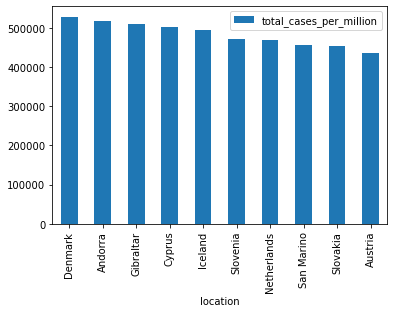

In [11]:
data_sorted = df_total.sort_values('total_cases_per_million', ascending=False)
ranking = data_sorted.head(10)
ranking.plot.bar(x='location', y='total_cases_per_million')

#### Countries with the HIGHEST proportion of accumulated DEATHS

<AxesSubplot:xlabel='location'>

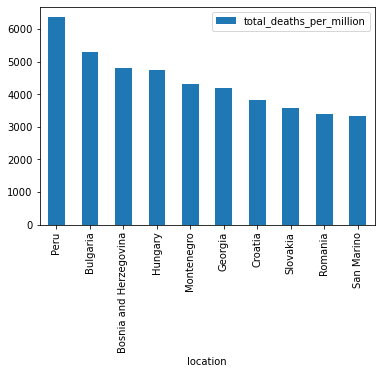

In [12]:
data_sorted = df_total.sort_values('total_deaths_per_million', ascending=False)
ranking = data_sorted.head(10)
ranking.plot.bar(x='location', y='total_deaths_per_million')

#### Countries with the LOWEST proportion of accumulated TEST

<AxesSubplot:xlabel='location'>

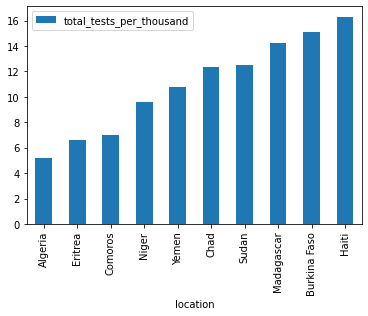

In [13]:
data_sorted = df_total.sort_values('total_tests_per_thousand')
ranking = data_sorted.head(10)
ranking.plot.bar(x='location', y='total_tests_per_thousand')

#### Countries with the LOWEST proportion of accumulated VACCINATION

<AxesSubplot:xlabel='location'>

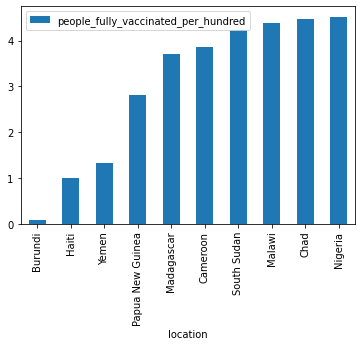

In [14]:
data_sorted = df_total.sort_values('people_fully_vaccinated_per_hundred')
ranking = data_sorted.head(10)
ranking.plot.bar(x='location', y='people_fully_vaccinated_per_hundred')

#### See the correlation between cases, deaths, tests, and vaccination

In [10]:
# Set unique index to the data frist

df_total = df_total.set_index('location')
df_total = df_total[~df_total.index.duplicated(keep='first')]

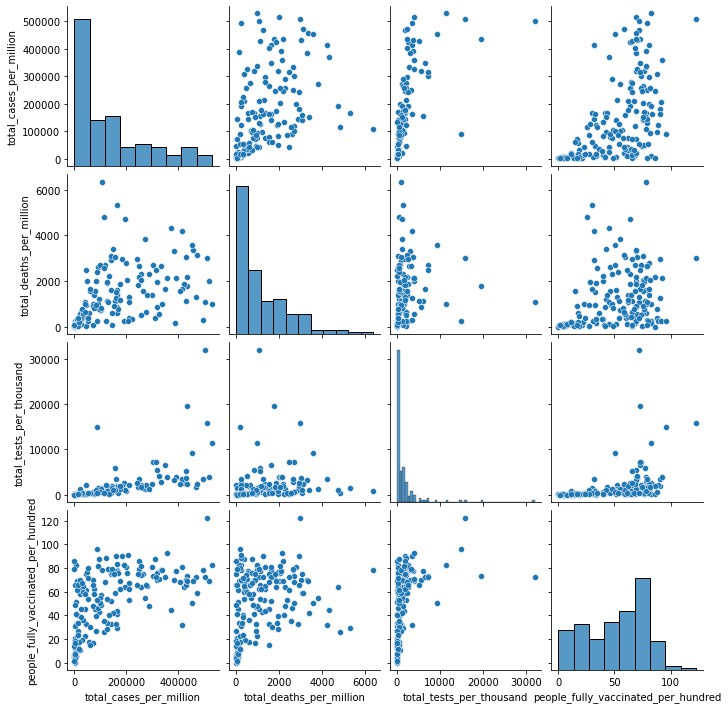

In [16]:
sns.pairplot(df_total[['total_cases_per_million', 'total_deaths_per_million', 'total_tests_per_thousand', 'people_fully_vaccinated_per_hundred']])

* cases ~ death
* cases ~ test
* cases tend to be more stable when there is high vaccination proportion
* vaccination and testing has no relationship

#### See the correlation between cases and citizen characteristics

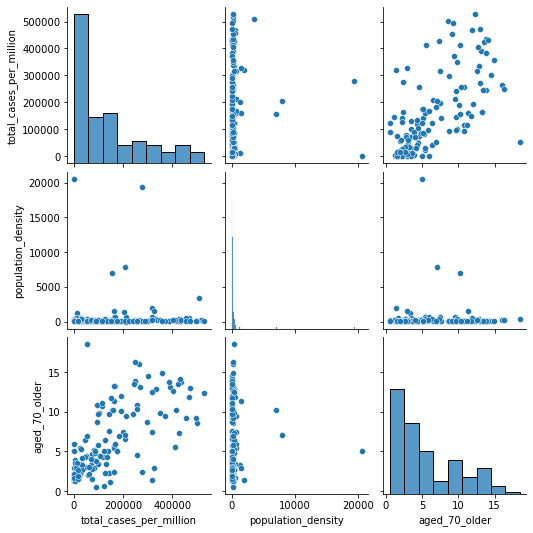

In [17]:
sns.pairplot(df_total[['total_cases_per_million', 'population_density', 'aged_70_older']])

* elderly people ~ case
* population density has no relationship with case

#### See the correlation between cases and country quality of life

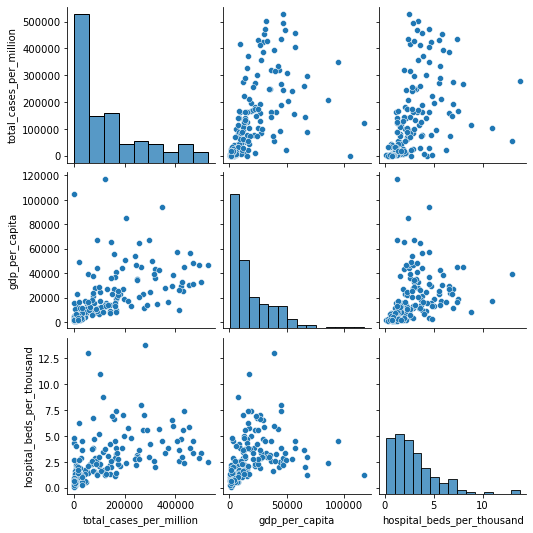

In [18]:
sns.pairplot(df_total[['total_cases_per_million', 'gdp_per_capita', 'hospital_beds_per_thousand']])

* case ~ GDP (Oh, what!?)
* case ~ bed (Oh, what!?)
* GDP ~ bed
* Can this imply that higher developed countries are more honest on reporting case?

## Let's try plot graph of a country to see -- Thailand

In [11]:
df_country('Thailand')

,continent,location,date,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,people_fully_vaccinated_per_hundred,new_people_vaccinated_smoothed_per_hundred,population,population_density,aged_70_older,gdp_per_capita,hospital_beds_per_thousand
157365,Asia,Thailand,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,69950844.0,135.132,6.89,16277.671,2.1
157366,Asia,Thailand,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,69950844.0,135.132,6.89,16277.671,2.1
157367,Asia,Thailand,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,69950844.0,135.132,6.89,16277.671,2.1
157368,Asia,Thailand,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69950844.0,135.132,6.89,16277.671,2.1
157369,Asia,Thailand,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,69950844.0,135.132,6.89,16277.671,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158184,Asia,Thailand,2022-04-02,53060.046,383.698,363.327,1.387,1.03,NaN,NaN,NaN,NaN,NaN,71.85,0.065,69950844.0,135.132,6.89,16277.671,2.1
158185,Asia,Thailand,2022-04-03,53415.896,355.850,364.713,1.387,1.02,NaN,NaN,NaN,NaN,NaN,71.86,0.064,69950844.0,135.132,6.89,16277.671,2.1
158186,Asia,Thailand,2022-04-04,53717.365,301.469,366.014,1.301,NaN,NaN,NaN,NaN,NaN,NaN,71.89,0.060,69950844.0,135.132,6.89,16277.671,2.1
158187,Asia,Thailand,2022-04-05,53717.365,0.000,366.014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,71.93,0.054,69950844.0,135.132,6.89,16277.671,2.1


### Plot the daily trend

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

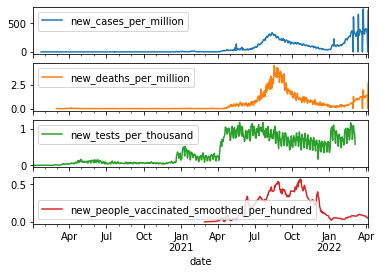

In [20]:
# Shorter formula to plot
df_country('Thailand').set_index('date')[['new_cases_per_million','new_deaths_per_million',
                                          'new_tests_per_thousand', 
                                          'new_people_vaccinated_smoothed_per_hundred']].plot(subplots=True) 

* From this plot, we can see that Thailand has 1 big outbreak around August 2021 before slowing down and tending to rise again around April 2022.
* For the testing, Thailand boosted its testing 2 times, firstly around January 2021 and another time was right before the big outbreak on April 2021
* Maybe more testing leads to more case discovery
* Thailand just started the vaccination since March 2021

### Plot the total cases, deaths, tests, and vaccinated people to see Thailand is achieving the preventive goals in what speed

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

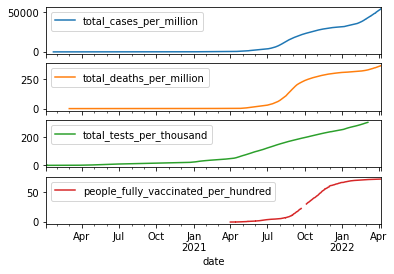

In [21]:
df_country('Thailand').set_index('date')[['total_cases_per_million','total_deaths_per_million',
                                          'total_tests_per_thousand', 
                                          'people_fully_vaccinated_per_hundred']].plot(subplots=True) 

### After seeing Thailand's daily trend, its slope will tell how fast and which way they are going toward. Comparing 2 trends, we might see something
# Get slope of case and test of each country, may have clusters

### Using slope of Linear Model Fit

In [12]:
def calculating_slope(y):
        y = y.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
        if len(y)>1:
            slope = np.polyfit(range(len(y)), y, 1)[0]
        else: 
            slope = 0
        return slope

In [13]:
testlist = df_country('Thailand')['new_tests_per_thousand'].astype(float)
calculating_slope(testlist)

0.0012912298746397552

* Slope of new testing as X
* Slope of new case as Y

In [14]:
X = []
Y = []
for i in countrylist:
    testlist = df_country(i)['new_tests_per_thousand'].astype(float)
    caselist = df_country(i)['new_cases_per_million'].astype(float)
    X.append(calculating_slope(testlist))
    Y.append(calculating_slope(caselist))

In [78]:
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df_testcase = pd.DataFrame(list(zip(X, Y)), index = countrylist, columns =['test_slope', 'case_slope'])
df_testcase

,test_slope,case_slope
Afghanistan,0.000000,0.003028
Albania,0.002296,0.234029
Algeria,0.000000,0.006230
Andorra,0.000000,2.124603
Angola,-0.062700,0.009899
...,...,...
Vanuatu,0.000000,0.326842
Wallis and Futuna,0.000000,-0.375613
Yemen,0.000000,0.000438
Zambia,0.000368,0.052318


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

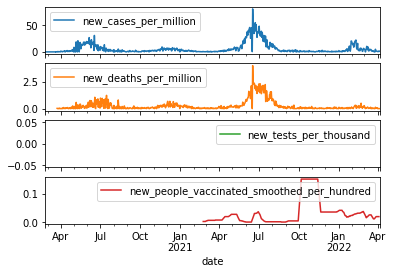

In [16]:
df_country('Afghanistan').set_index('date')[['new_cases_per_million','new_deaths_per_million',
                                          'new_tests_per_thousand', 
                                          'new_people_vaccinated_smoothed_per_hundred']].plot(subplots=True) 

So, if any country has test slope = 0, it means that they never test

#### Drop countries which have trend = 0 away

In [79]:
df_testcase = df_testcase[df_testcase.test_slope != 0]
df_testcase = df_testcase[df_testcase.case_slope != 0]

# multiply test slope by 100 to distribute the scatter plot for better seeing
df_testcase['test_slope'] = df_testcase['test_slope'].apply(lambda x: x*100)

df_testcase

,test_slope,case_slope
Albania,0.229635,0.234029
Angola,-6.270000,0.009899
Argentina,0.228495,0.634639
Armenia,0.294490,0.212372
Australia,0.901904,1.516338
...,...,...
United Kingdom,2.583082,1.461971
United States,0.405002,0.703541
Uruguay,0.630335,1.338911
Zambia,0.036818,0.052318


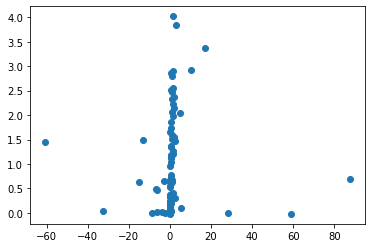

In [80]:
plt.scatter(df_testcase['test_slope'],df_testcase['case_slope'])
plt.show()

#### Zoom to see cluster among the data that is not to jumped out

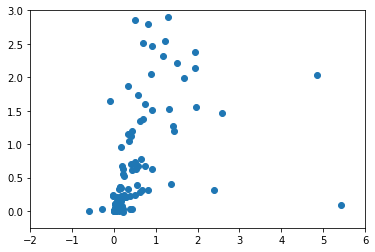

In [97]:
plt.scatter(df_testcase['test_slope'],df_testcase['case_slope'])
plt.xlim(-2,6)
plt.ylim(-0.25,3)
plt.show()

In [98]:
df_testcase = df_testcase[6 > df_testcase.test_slope]
df_testcase = df_testcase[df_testcase.test_slope > -2]
df_testcase = df_testcase[3 > df_testcase.case_slope]
df_testcase = df_testcase[df_testcase.case_slope > -0.25]
df_testcase

,test_slope,case_slope,Clusters
Albania,0.229635,0.234029,1
Argentina,0.228495,0.634639,1
Armenia,0.294490,0.212372,1
Australia,0.901904,1.516338,0
Azerbaijan,0.374404,0.219269,1
...,...,...,...
United Kingdom,2.583082,1.461971,0
United States,0.405002,0.703541,1
Uruguay,0.630335,1.338911,0
Zambia,0.036818,0.052318,1


#### Find cluster

In [103]:
kmeans1 = KMeans(4)
kmeans1.fit(df_testcase)

KMeans(n_clusters=4)

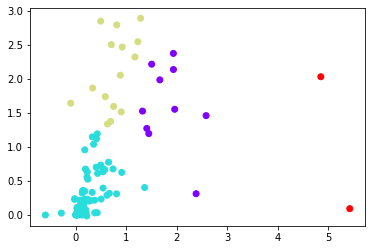

In [104]:
df_testcase['Clusters'] = kmeans.fit_predict(df_testcase) 
plt.scatter(df_testcase['test_slope'], df_testcase['case_slope'],c=df_testcase['Clusters'],cmap='rainbow')

In [105]:
df_testcaseC0 = df_testcase.loc[df_testcase['Clusters'] == 0]
df_testcaseC1 = df_testcase.loc[df_testcase['Clusters'] == 1]
df_testcaseC2 = df_testcase.loc[df_testcase['Clusters'] == 2]
df_testcaseC3 = df_testcase.loc[df_testcase['Clusters'] == 3]

In [124]:
print("countries in purple :", df_testcaseC0.index)
print("countries in blue :", df_testcaseC1.index)
print("countries in green :", df_testcaseC2.index)
print("countries in red :", df_testcaseC3.index)

countries in purple : Index(['Bahrain', 'Belarus', 'France', 'Georgia', 'Israel', 'Italy',
       'Maldives', 'Mongolia', 'Portugal', 'United Kingdom'],
      dtype='object')
countries in blue : Index(['Albania', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Cambodia', 'Canada', 'Cape Verde', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Ethiopia', 'Fiji', 'Finland', 'Ghana', 'Guatemala',
       'Haiti', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Libya', 'Madagascar',
       'Malawi', 'Malaysia', 'Malta', 'Mauritania', 'Mexico', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria',
       'Pakistan', 'Panama', 'Paraguay', 'Philippines', 'Qatar', 'Rwanda',
       'Saudi Arabia', 'Senegal', 'Serbia', 'South Africa', 'Sout

* cluster 0 (purple) = faster test and found decreasing case
* cluster 1 (blue) = slow test, slower case >>> OK
* cluster 2 (green) = slower test than cluster 0, but faster case too
* cluster 3 (red) = very speed test countries

In [125]:
def showtrend(country):
    df_country(country).set_index('date')[['new_cases_per_million','new_deaths_per_million',
                                          'new_tests_per_thousand', 
                                          'new_people_vaccinated_smoothed_per_hundred']].plot(subplots=True) 

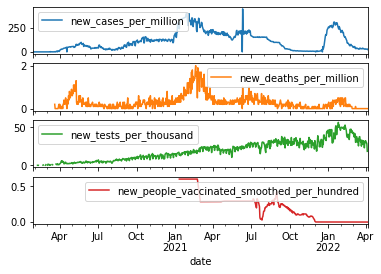

In [127]:
showtrend('United Arab Emirates')

#### Find average and variance of vaccination proportion to validate the assumption

In [106]:
df_testcaseC0 = pd.merge(df_testcaseC0,
                         df_total[['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']],
                         left_index=True, right_index=True)
df_testcaseC1 = pd.merge(df_testcaseC1,
                         df_total[['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']],
                         left_index=True, right_index=True)
df_testcaseC2 = pd.merge(df_testcaseC2,
                         df_total[['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']],
                         left_index=True, right_index=True)
df_testcaseC3 = pd.merge(df_testcaseC3,
                         df_total[['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']],
                         left_index=True, right_index=True)

In [113]:
for i in ['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']:
    df_testcaseC0[i] = pd.to_numeric(df_testcaseC0[i], downcast="float")
    df_testcaseC1[i] = pd.to_numeric(df_testcaseC1[i], downcast="float")
    df_testcaseC2[i] = pd.to_numeric(df_testcaseC2[i], downcast="float")
    df_testcaseC3[i] = pd.to_numeric(df_testcaseC3[i], downcast="float")

In [118]:
df_testcaseC0.describe().loc[['mean','std']]

,test_slope,case_slope,Clusters,people_fully_vaccinated_per_hundred,gdp_per_capita,hospital_beds_per_thousand
mean,1.815208,1.605298,0.0,68.255997,27187.644531,4.520000
std,0.424916,0.612362,0.0,16.018341,12615.039062,2.950487


So, the countries that has fast testing and found many cases, have good vaccination, GDP, and hospital bed

In [119]:
df_testcaseC1.describe().loc[['mean','std']]

,test_slope,case_slope,Clusters,people_fully_vaccinated_per_hundred,gdp_per_capita,hospital_beds_per_thousand
mean,0.221124,0.279239,1.0,49.214939,16133.582031,2.518564
std,0.278466,0.314363,0.0,26.023466,18143.550781,2.218267


The country that has tested in slow speed leading to slow case speed are poor countries with low vaccination, GDP, and hospital bed

In [121]:
df_testcaseC2.describe().loc[['mean','std']]

,test_slope,case_slope,Clusters,people_fully_vaccinated_per_hundred,gdp_per_capita,hospital_beds_per_thousand
mean,0.753768,2.101692,2.0,71.421333,44418.996094,4.223133
std,0.356144,0.555323,0.0,8.901905,20468.472656,1.287636


This group has lower testing, but faster case growth. They have high vaccination, GDP, and hospital bed

In [122]:
df_testcaseC3.describe().loc[['mean','std']]

,test_slope,case_slope,Clusters,people_fully_vaccinated_per_hundred,gdp_per_capita,hospital_beds_per_thousand
mean,5.142665,1.063820,3.0,84.805000,45933.933594,2.705000
std,0.405720,1.371835,0.0,16.284668,30206.966797,2.128392


# Get slope of case and death of each country, may have clusters

### Using slope of Linear Model Fit

* Slope of new case as X
* Slope of new death as Y

In [128]:
Z = []
for i in countrylist:
    deathlist = df_country(i)['new_deaths_per_million'].astype(float)
    Z.append(calculating_slope(deathlist))

In [129]:
df_casedeath = pd.DataFrame(list(zip(Y, Z)), index = countrylist, columns =['case_slope', 'death_slope'])
df_casedeath

,case_slope,death_slope
Afghanistan,0.003028,0.000047
Albania,0.234029,0.000363
Algeria,0.006230,0.000012
Andorra,2.124603,-0.006158
Angola,0.009899,0.000102
...,...,...
Vanuatu,0.326842,0.000148
Wallis and Futuna,-0.375613,-0.023703
Yemen,0.000438,-0.000034
Zambia,0.052318,0.000289


#### Drop countries which have trend = 0 away

In [131]:
df_casedeath = df_casedeath[df_casedeath.death_slope != 0]
df_casedeath = df_casedeath[df_casedeath.case_slope != 0]

df_casedeath

,case_slope,death_slope
Afghanistan,0.003028,0.000047
Albania,0.234029,0.000363
Algeria,0.006230,0.000012
Andorra,2.124603,-0.006158
Angola,0.009899,0.000102
...,...,...
Vanuatu,0.326842,0.000148
Wallis and Futuna,-0.375613,-0.023703
Yemen,0.000438,-0.000034
Zambia,0.052318,0.000289


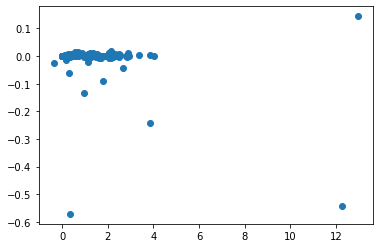

In [132]:
plt.scatter(df_casedeath['case_slope'],df_casedeath['death_slope'])
plt.show()

#### Zoom to see cluster among the data that is not to jumped out

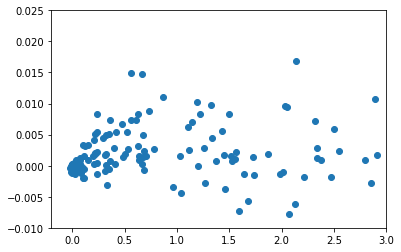

In [137]:
plt.scatter(df_casedeath['case_slope'],df_casedeath['death_slope'])
plt.xlim(-0.2,3)
plt.ylim(-0.01,0.025)
plt.show()

In [138]:
df_casedeath = df_casedeath[0.025 > df_casedeath.death_slope]
df_casedeath = df_casedeath[df_casedeath.death_slope > -0.01]
df_casedeath = df_casedeath[3 > df_casedeath.case_slope]
df_casedeath = df_casedeath[df_casedeath.case_slope > -0.2]
df_casedeath

,case_slope,death_slope
Afghanistan,0.003028,0.000047
Albania,0.234029,0.000363
Algeria,0.006230,0.000012
Andorra,2.124603,-0.006158
Angola,0.009899,0.000102
...,...,...
Uzbekistan,0.009867,0.000040
Vanuatu,0.326842,0.000148
Yemen,0.000438,-0.000034
Zambia,0.052318,0.000289


#### Find cluster

In [163]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(df_casedeath)

KMeans(n_clusters=4)

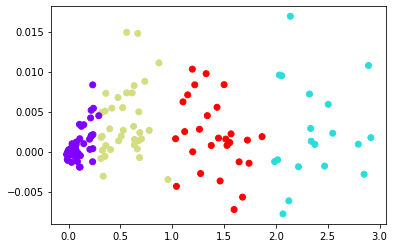

In [164]:
df_casedeath['Clusters'] = kmeans.fit_predict(df_casedeath) 
plt.scatter(df_casedeath['case_slope'], df_casedeath['death_slope'],c=df_casedeath['Clusters'],cmap='rainbow')

In [150]:
df_casedeathC0 = df_casedeath.loc[df_casedeath['Clusters'] == 0]
df_casedeathC1 = df_casedeath.loc[df_casedeath['Clusters'] == 1]
df_casedeathC2 = df_casedeath.loc[df_casedeath['Clusters'] == 2]
df_casedeathC3 = df_casedeath.loc[df_casedeath['Clusters'] == 3]

In [165]:
print("countries in purple :", df_casedeathC0.index)
print("countries in blue :", df_casedeathC1.index)
print("countries in green :", df_casedeathC2.index)
print("countries in red :", df_casedeathC3.index)

countries in purple : Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Benin', 'Bosnia and Herzegovina', 'Brazil',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros',
       'Congo', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Jamaica', 'Kazakhstan',
       'Kenya', 'Kyrgyzstan', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mexico', 'Montserrat', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger',
       'Nigeria', 'Oman', 'Pakistan', 'Papua New Guinea', 'Paraguay',
       'Philippines', 'Qatar', 'Rwanda', 'Sao Tome and Principe',
       'Saudi Arabia',

* In 4 clusters, from left to right
* left means speed of death has high proportion compared to speed of case
* When speed of case is high, speed of death really varies

#### Find average and variance of vaccination proportion to validate the assumption

In [166]:
df_casedeathC0 = pd.merge(df_casedeathC0,
                         df_total[['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']],
                         left_index=True, right_index=True)
df_casedeathC1 = pd.merge(df_casedeathC1,
                         df_total[['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']],
                         left_index=True, right_index=True)
df_casedeathC2 = pd.merge(df_casedeathC2,
                         df_total[['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']],
                         left_index=True, right_index=True)
df_casedeathC3 = pd.merge(df_casedeathC3,
                         df_total[['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']],
                         left_index=True, right_index=True)

In [167]:
for i in ['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'hospital_beds_per_thousand']:
    df_casedeathC0[i] = pd.to_numeric(df_casedeathC0[i], downcast="float")
    df_casedeathC1[i] = pd.to_numeric(df_casedeathC1[i], downcast="float")
    df_casedeathC2[i] = pd.to_numeric(df_casedeathC2[i], downcast="float")
    df_casedeathC3[i] = pd.to_numeric(df_casedeathC3[i], downcast="float")

In [168]:
df_casedeathC0.describe().loc[['mean','std']]

,case_slope,death_slope,Clusters,people_fully_vaccinated_per_hundred,gdp_per_capita,hospital_beds_per_thousand
mean,0.057429,0.000486,0.0,33.240002,9449.950195,1.720685
std,0.078613,0.001578,0.0,25.104130,15752.116211,1.432295


In [316]:
df_casedeathC1.describe().loc[['mean','std']]

,case_slope,death_slope,Clusters,people_fully_vaccinated_per_hundred,gdp_per_capita,hospital_beds_per_thousand
mean,1.403607,0.001922,1.0,71.809990,39765.250000,4.54000
std,0.229531,0.004576,0.0,11.281464,22010.162109,2.66485


Countries with high speed of death compared to speed of case have low vaccination, GDP, and hospital bed

In [169]:
df_casedeathC2.describe().loc[['mean','std']]

,case_slope,death_slope,Clusters,people_fully_vaccinated_per_hundred,gdp_per_capita,hospital_beds_per_thousand
mean,0.540474,0.003639,2.0,59.494167,22174.501953,3.828265
std,0.172694,0.004322,0.0,19.696062,14326.636719,2.887171


In [317]:
df_casedeathC3.describe().loc[['mean','std']]

,case_slope,death_slope,Clusters,people_fully_vaccinated_per_hundred,gdp_per_capita,hospital_beds_per_thousand
mean,2.368564,0.002479,3.0,69.586838,35255.367188,4.457937
std,0.312621,0.006192,0.0,13.212538,13100.560547,1.458040


# Time-series clustering
## To see any country has same number of outbreak and their remediation

### Prepare data

In [269]:
df_date = pd.DataFrame(df.date.unique())
df_date.rename(columns = {0:'date'}, inplace = True)
df_date.sort_values(by="date", inplace = True)

worldnewcase = df_date
for i in countrylist:
    worldnewcase = worldnewcase.merge(df_country(i)[['date', 'new_cases_per_million']], on='date', how='outer')
    worldnewcase.rename(columns = {'new_cases_per_million':i}, inplace = True)

In [270]:
worldnewcase

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2022-04-02,0.527,22.277,0.112,0.0,0.0,0.0,17.585,7.749,0.000,...,28.425,0.000,31.546,141.457,1.208,543.782,0.0,0.000,4.757,4.439
823,2022-04-03,0.602,16.360,0.157,0.0,0.0,0.0,10.613,3.706,0.000,...,29.827,0.000,13.775,109.321,0.737,1132.085,0.0,0.000,0.000,2.915
824,2022-04-04,1.757,14.967,0.067,0.0,0.0,0.0,43.284,2.358,0.000,...,30.027,2096.409,71.766,179.906,1.031,616.923,0.0,0.066,4.175,5.765
825,2022-04-05,0.879,30.283,0.112,0.0,0.0,0.0,48.853,4.380,0.000,...,24.422,747.737,88.674,241.022,0.530,22.260,0.0,0.131,5.867,8.746


In [271]:
worldnewcase.fillna(0, inplace=True)

In [272]:
worldnewcase = worldnewcase.loc[:, (worldnewcase != 0).any(axis=0)]

In [273]:
worldnewcase = worldnewcase.transpose()
new_header = worldnewcase.iloc[0] #grab the first row for the header
worldnewcase = worldnewcase[1:] #take the data less the header row
worldnewcase.columns = new_header #set the header row as the df header

In [274]:
worldnewcase

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.058,1.406,1.456,0.778,0.879,0.527,0.602,1.757,0.879,1.054
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33.763,27.498,24.017,28.542,22.277,16.36,14.967,30.283,19.144
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.269,0.224,0.247,0.202,0.179,0.112,0.157,0.067,0.112,0.134
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4020.477,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.678,0.0,0.914,0.737,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1364.226,251.221,1322.886,798.184,1052.585,543.782,1132.085,616.923,22.26,874.504
Wallis and Futuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066,0.033,0.0,0.0,0.0,0.066,0.131,0.0
Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.856,4.81,4.757,0.0,4.175,5.867,7.241


#### 186 countries left from 199 because those 13 countries have 0 new case everyday

### Cluster Time-series using tslearn and Dynamic Time Warping

In [219]:
from tslearn.clustering import TimeSeriesKMeans

In [275]:
worldnewcase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, Afghanistan to Zimbabwe
Columns: 827 entries, 2020-01-01 to 2022-04-06
dtypes: object(827)
memory usage: 1.2+ MB


In [237]:
#worldnewcase['date'] = pd.to_numeric(pd.to_datetime(worldnewcase['date']))

/var/folders/tr/m4101mdn7tv02vgqmnsfxppr0000gn/T/ipykernel_2202/110612452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldnewcase['date'] = pd.to_numeric(pd.to_datetime(worldnewcase['date']))


In [277]:
# Use tslearn to use Dynamic Time Warping instead of Euclidean
# because this is more suitble for Time-series data

model = TimeSeriesKMeans(n_clusters=3, metric="dtw")
model.fit(worldnewcase)

TimeSeriesKMeans(metric='dtw')

In [296]:
worldnewcaseC0 = []
worldnewcaseC1 = []
worldnewcaseC2 = []
for i in worldnewcase.index.tolist():
    if float(model.predict(np.array(worldnewcase.loc[i].values.tolist()).reshape(1, -1))) == 0:
        worldnewcaseC0.append(i)
    elif float(model.predict(np.array(worldnewcase.loc[i].values.tolist()).reshape(1, -1))) == 1:
        worldnewcaseC1.append(i)
    elif float(model.predict(np.array(worldnewcase.loc[i].values.tolist()).reshape(1, -1))) == 2:
        worldnewcaseC2.append(i)
print(worldnewcaseC0)
print(worldnewcaseC1)
print(worldnewcaseC2)

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macao', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mexico', 'Mongolia

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

* Cluster 0 includes ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macao', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mexico', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Qatar', 'Romania', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone', 'Singapore', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Tajikistan', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']
* Cluster 1 includes ['Aruba', 'Australia', 'Austria', 'Belgium', 'Bermuda', 'Botswana', 'Cook Islands', 'Cyprus', 'Denmark', 'Dominica', 'Estonia', 'France', 'French Polynesia', 'Georgia', 'Gibraltar', 'Greenland', 'Grenada', 'Hong Kong', 'Iceland', 'Ireland', 'Isle of Man', 'Israel', 'Latvia', 'Liechtenstein', 'Luxembourg', 'Maldives', 'Mauritius', 'Monaco', 'Netherlands', 'New Caledonia', 'New Zealand', 'Palau', 'Portugal', 'Saint Vincent and the Grenadines', 'San Marino', 'Seychelles', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Tonga', 'Turks and Caicos Islands']
* Cluster 2 includes ['Andorra', 'Cayman Islands', 'Saint Pierre and Miquelon']

In [289]:
worldnewcase.transpose()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Wallis and Futuna,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-02,0.527,22.277,0.112,0.0,0.0,0.0,17.585,7.749,0.0,1865.077,...,28.425,0.0,31.546,141.457,1.208,543.782,0.0,0.0,4.757,4.439
2022-04-03,0.602,16.36,0.157,0.0,0.0,0.0,10.613,3.706,0.0,1574.75,...,29.827,0.0,13.775,109.321,0.737,1132.085,0.0,0.0,0.0,2.915
2022-04-04,1.757,14.967,0.067,0.0,0.0,0.0,43.284,2.358,0.0,2153.852,...,30.027,2096.409,71.766,179.906,1.031,616.923,0.0,0.066,4.175,5.765


<AxesSubplot:xlabel='date'>

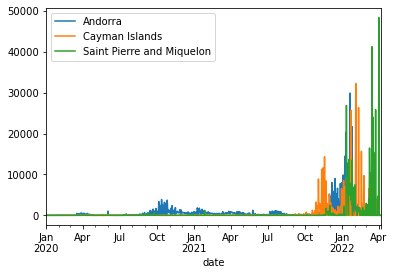

In [297]:
worldnewcase.transpose().set_index(worldnewcase.transpose().index)[worldnewcaseC2].plot(subplots=False)

<AxesSubplot:xlabel='date'>

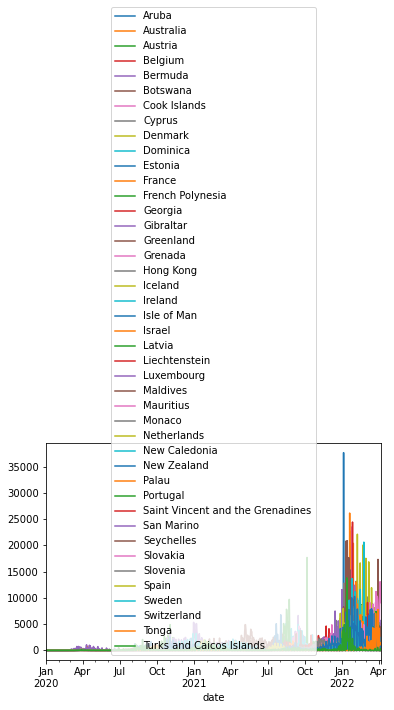

In [298]:
worldnewcase.transpose().set_index(worldnewcase.transpose().index)[worldnewcaseC1].plot(subplots=False)

<AxesSubplot:xlabel='date'>

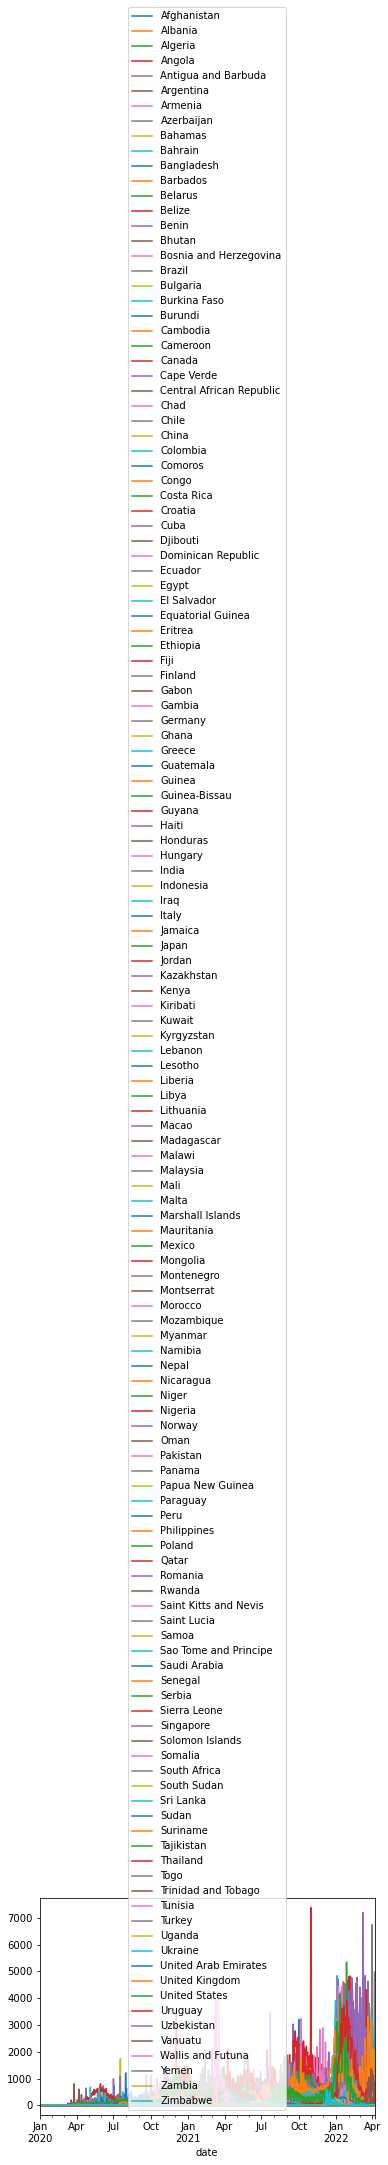

In [299]:
worldnewcase.transpose().set_index(worldnewcase.transpose().index)[worldnewcaseC0].plot(subplots=False)

# Time-series clustering -- using only from 7 Oct 2020

In [309]:
worldnewcase.columns[0:280]

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30',
               '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06'],
              dtype='datetime64[ns]', name='date', length=280, freq=None)

In [313]:
worldnewcase.drop(worldnewcase.columns[0:280], axis=1).head()

date,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,...,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06
Afghanistan,1.556,1.707,1.933,0.251,2.41,1.782,1.456,1.657,0.803,1.18,...,2.058,1.406,1.456,0.778,0.879,0.527,0.602,1.757,0.879,1.054
Albania,56.388,58.825,58.129,57.433,58.477,59.521,63.35,70.659,89.456,100.594,...,0.0,33.763,27.498,24.017,28.542,22.277,16.36,14.967,30.283,19.144
Algeria,2.712,3.093,3.272,3.048,2.959,5.671,1.659,4.146,4.326,4.953,...,0.269,0.224,0.247,0.202,0.179,0.112,0.157,0.067,0.112,0.134
Andorra,2559.661,0.0,1654.73,0.0,0.0,3865.346,0.0,2520.878,0.0,2417.457,...,0.0,0.0,4020.477,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,6.866,2.151,6.336,3.536,3.595,5.658,4.892,7.367,3.713,...,0.0,0.678,0.0,0.914,0.737,0.0,0.0,0.0,0.0,0.0


In [312]:
# Use tslearn to use Dynamic Time Warping instead of Euclidean
# because this is more suitble for Time-series data

model2 = TimeSeriesKMeans(n_clusters=3, metric="dtw")
model2.fit(worldnewcase.drop(worldnewcase.columns[0:280], axis=1))

TimeSeriesKMeans(metric='dtw')

In [314]:
worldnewcaseCUT = worldnewcase.drop(worldnewcase.columns[0:280], axis=1)

In [315]:
worldnewcaseCUTC0 = []
worldnewcaseCUTC1 = []
worldnewcaseCUTC2 = []
for i in worldnewcaseCUT.index.tolist():
    if float(model.predict(np.array(worldnewcaseCUT.loc[i].values.tolist()).reshape(1, -1))) == 0:
        worldnewcaseCUTC0.append(i)
    elif float(model.predict(np.array(worldnewcaseCUT.loc[i].values.tolist()).reshape(1, -1))) == 1:
        worldnewcaseCUTC1.append(i)
    elif float(model.predict(np.array(worldnewcaseCUT.loc[i].values.tolist()).reshape(1, -1))) == 2:
        worldnewcaseCUTC2.append(i)
print(worldnewcaseCUTC0)
print(worldnewcaseCUTC1)
print(worldnewcaseCUTC2)

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/stevejen/opt/anaconda3/lib/python3.9/site-package

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macao', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mexico', 'Mongolia

/Users/stevejen/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


#### Cut only since 7 Oct 2020, the result is the same TT, so, I finished it, and will be the point for improvement